# Praca z plikami w Pythonie 

## Czyli jak czytać i zapisywać dane

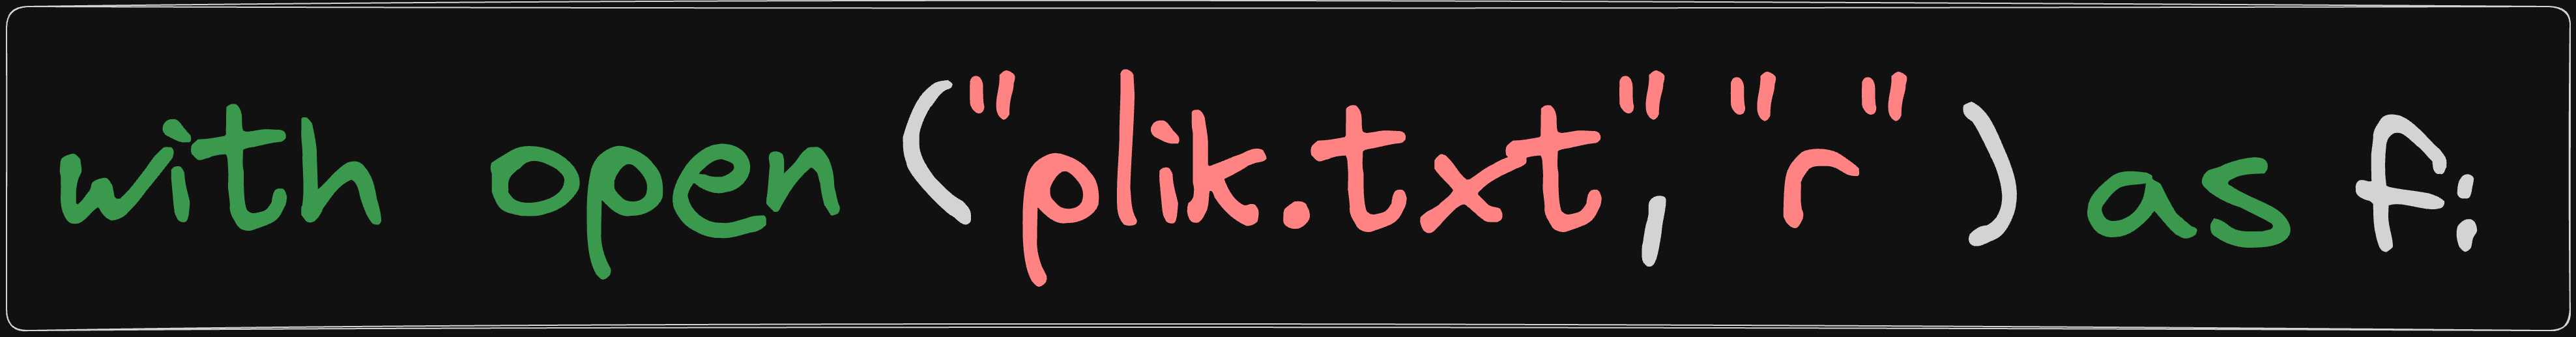

## Zanim zaczniemy!

Utwórz w tym samym folderze, w którym istnieje ten notebook dwa pliki:

* `plik.txt`
* do pliku `plik.txt` wpisz cokolwiek ;-)
* `klienci.txt` (ten niech pozostanie pusty)

## Przykłady

### Otwarcie pliku

Aby pracować z plikiem w Pythonie, musisz najpierw go otworzyć. Używamy do tego funkcji `open()`.


In [ ]:
f = open('plik.txt', 'r')
# następnie możemy wczytać zawartość pliku
content = f.read()
print(content)
# i na koniec koniecznie musimy zamknąć otwarty plik
f.close()

możemy osiągnąć to samo co powyżej bez konieczności pamiętania o zamykaniu pliku, używając konstrukcji `with`

In [ ]:
with open('plik.txt', 'r') as f:  # 'r' oznacza tryb tylko do odczytu (read)
    content = f.read()
    print(content)

### Tryby otwarcia pliku

Plik może być otwarty w jednym z trybów:

- `'r'`: Tylko do odczytu
- `'w'`: Tylko do zapisu (jeśli plik nie istnieje, zostanie stworzony; jeśli istnieje, jego zawartość zostanie nadpisana)
- `'a'`: Do dopisywania (dodatkowe dane będą dopisywane na końcu pliku, bez kasowania jego zawartości)
- `'r+'`: Odczyt i zapis


### Czytanie z pliku - całej zawartości

In [ ]:
with open('plik.txt', 'r') as file:
    content = file.read()
    print(content)

### Czytanie linia po linii

In [ ]:
with open('plik.txt', 'r') as file:
    for line in file:
        print(line.strip())  # strip() usuwa znaki nowej linii

### Nadpisywanie pliku

In [ ]:
with open('plik.txt', 'w') as file:
    file.write("Witaj, świecie!")

### Dopisywanie do istniejącego pliku

In [ ]:
with open('plik.txt', 'a') as file:
    file.write("\nDopisuję nową linijkę.")

### Przykład w kontekście rzeczywistym

Załóżmy, że masz plik `klienci.txt`, który zawiera informacje o klientach i chcesz dopisać nowego klienta do pliku.


In [ ]:
# Otwórz plik do dopisywania danych
with open('klienci.txt', 'a') as file:
    # Dane nowego klienta
    nowy_klient = "Jan Kowalski, jan.kowalski@example.com\n"

    # Dopisz nowego klienta
    file.write(nowy_klient)


Aby przeczytać i wyświetlić wszystkich klientów z pliku:


In [ ]:
# Otwórz plik do odczytu
with open('klienci.txt', 'r') as file:
    # Czytaj linia po linii
    for linia in file:
        print(linia.strip())

In [ ]:
# Raz jeszcze: Otwórz plik do dopisywania danych
with open('klienci.txt', 'a') as file:
    # Dane nowego klienta
    nowy_klient = "Adam Smith, adam.smith@example.com\n"

    # Dopisz nowego klienta
    file.write(nowy_klient)

In [ ]:
# Raz jeszcze: Otwórz plik do odczytu
with open('klienci.txt', 'r') as file:
    # Czytaj linia po linii
    for linia in file:
        print(linia.strip())

## Przykładowe błędy

### Błąd podczas otwierania pliku, który nie istnieje

Jeśli próbujesz otworzyć plik, który nie istnieje, Python zwróci błąd `FileNotFoundError`.

In [ ]:
try:
   with open('nieistniejący_plik.txt', 'r') as file:
       content = file.read()
except FileNotFoundError as e:
   print(f"Błąd: {e}")

### Błąd dostępu przy próbie zapisu do pliku otworzonego w trybie tylko do odczytu

Jeśli próbujesz zapisać coś do pliku, który został otwarty w trybie do odczytu, dostaniesz błąd `UnsupportedOperation`.

In [ ]:
try:
   with open('plik.txt', 'r') as file:
       file.write('To nie zadziała')
except IOError as e:
   print(f"Błąd: {e}")

### Błąd przy próbie odczytu z pliku otworzonego w trybie do zapisu

Gdy próbujesz odczytać zawartość pliku w trybie do zapisu, Python również zwróci błąd `UnsupportedOperation`.

In [ ]:
try:
   with open('plik.txt', 'w') as file:
       content = file.read()
except IOError as e:
   print(f"Błąd: {e}")

### Błąd przy próbie pracy na zamkniętym pliku

Gdy próbujesz czytać lub pisać po zamknięciu pliku, dostaniesz błąd `ValueError`.

In [ ]:
try:
   with open('plik.txt', 'r') as file:
       print("do nothing")
       
   content = file.read()  # Próbujemy czytać po zamknięciu pliku
except ValueError as e:
   print(f"Błąd: {e}")